Load data of  sales volumes (in billion dollars) of sports equipment and textile production in the USA. 

In [2]:
data<-'https://raw.githubusercontent.com/sami-sifi/DATA-16-17/master/Volume%20des%20ventes%20de%20materiels%20sportif%20en%20MD%20au%20USA/Volume%20des%20ventes.txt'

Display data and check its class.

In [101]:
sport<-read.table(data, header=F)
class(sport)
length(sport$V1)


[1] "data.frame"

[1] 267

***Remark: if your  data is already downloaded, you can read them using the following instruction.***

`sport=read.table("ventesport.txt",header=F)`

**NB: In what follows, we will work with the `ts` class. A presentation of the classes `xts`, and `zoo` will be given at the end, based on the same dataset.**

***Question 1 :***  
Transform data to time series (ts, xts, zoo).  
Here, we  will focus on `ts` class and choose to work on the period January 1995 - December 2013.



In [110]:
sport.ts<-ts(sport,start=c(1995,1),end=c(2013,12),freq=12)
length(sport.ts)
length(sport$V1)
show(sport.ts)

[1] 228

[1] 267

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1995  3439  3264  3473  3523  3545  3611  3637  3986  3797  3758  4428  8565
1996  3801  3204  3686  3827  3770  3923  3839  4270  3988  3920  4853  9010
1997  3931  3543  4157  4101  4105  4302  4243  4900  4558  4355  5348  9706
1998  4454  3744  4374  4304  4403  4615  4484  5231  4794  4435  5715 10089
1999  4665  4095  4661  4552  4565  4816  4719  5543  4767  4769  6015 10601
2000  4830  4113  4735  4607  4874  4963  4848  5526  5027  4961  6162 10642
2001  4997  4447  4966  4989  5180  5364  5194  5808  5361  5227  6182 10930
2002  5243  4719  5388  5219  5364  5692  5523  6025  5656  5491  6685 11453
2003  5309  5161  5783  5577  5858  5954  5787  6507  6122  5527  6816 11407
2004  5621  5131  5898  5433  5726  5942  5666  6769  5876  5711  7401 11662
2005  6004  5054  5846  5476  5763  5744  5673  6770  5901  5679  7346 11424
2006  6026  4919  5507  5481  5648  5792  5721  7185  6085  5693  7039 11671

Checking the start date, end date, and data frequency.

In [66]:
start(sport.ts)
end(sport.ts)
frequency(sport.ts)

[1] 1995    1

[1] 2013   12

[1] 12

The time series under the class `ts` are represented in a matrix form. For our example,  rows indicate  years and the columns number indicates the chosen frequency (the number of observations per time unit). Example: 
- freq=1 for annual data
- freq=4 for quarterly data (the time unit is a year) 
- freq=12 for monthly data (the time unit is a year)  
  
  
To display the TS, we can use the `show()` command.

In [67]:
show(sport.ts)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1995  3439  3264  3473  3523  3545  3611  3637  3986  3797  3758  4428  8565
1996  3801  3204  3686  3827  3770  3923  3839  4270  3988  3920  4853  9010
1997  3931  3543  4157  4101  4105  4302  4243  4900  4558  4355  5348  9706
1998  4454  3744  4374  4304  4403  4615  4484  5231  4794  4435  5715 10089
1999  4665  4095  4661  4552  4565  4816  4719  5543  4767  4769  6015 10601
2000  4830  4113  4735  4607  4874  4963  4848  5526  5027  4961  6162 10642
2001  4997  4447  4966  4989  5180  5364  5194  5808  5361  5227  6182 10930
2002  5243  4719  5388  5219  5364  5692  5523  6025  5656  5491  6685 11453
2003  5309  5161  5783  5577  5858  5954  5787  6507  6122  5527  6816 11407
2004  5621  5131  5898  5433  5726  5942  5666  6769  5876  5711  7401 11662
2005  6004  5054  5846  5476  5763  5744  5673  6770  5901  5679  7346 11424
2006  6026  4919  5507  5481  5648  5792  5721  7185  6085  5693  7039 11671

***Question 2 :***  
Plot the obtained Time Series (TS) and make your interpretation.  
Check `help(plot)` for more details about the `plot()` function inputs.

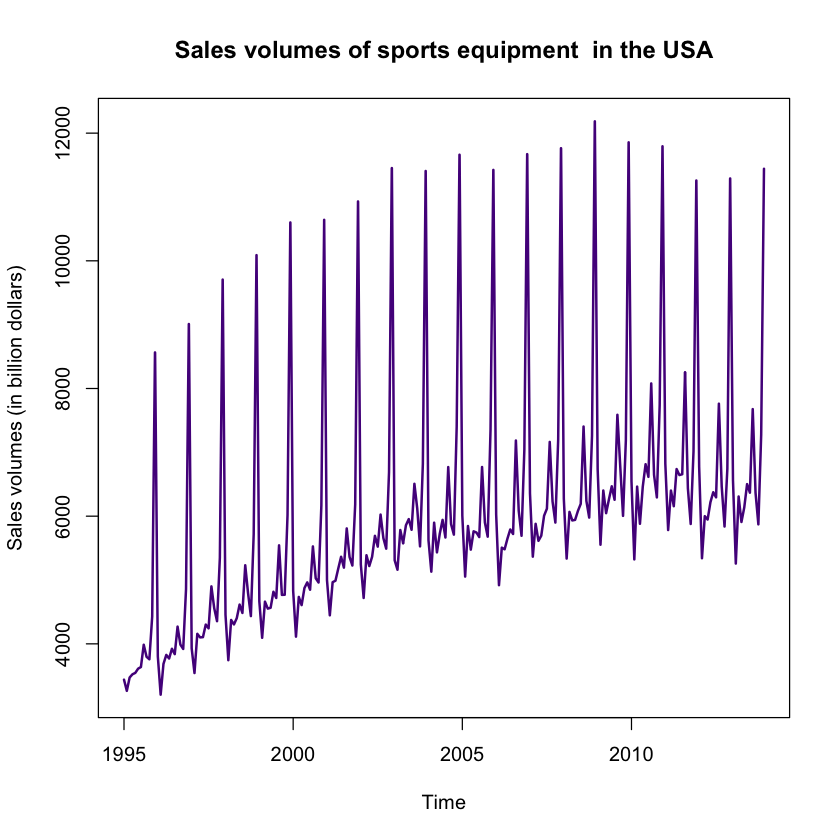

In [118]:
plot(sport.ts, xlab="Time", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="purple4",lwd=2)

The TS graph shows noticeable seasonality and the presence of a trend that seems to be linear.

***Question 3 :***   
Give an aggregation into annual series and interpret the result.  
For each row (year) the function `aggregate(sport.ts,FUN="mean")` calculates the average values (monthly in this case). 

In [124]:
show(sport.ts.sum)

Time Series:
Start = 1995 
End = 2013 
Frequency = 1 
 [1] 49026 52091 57249 60642 63768 65288 68645 72458 75808 76836 76680 76767
[13] 79284 80889 83148 84651 84037 81040 81657


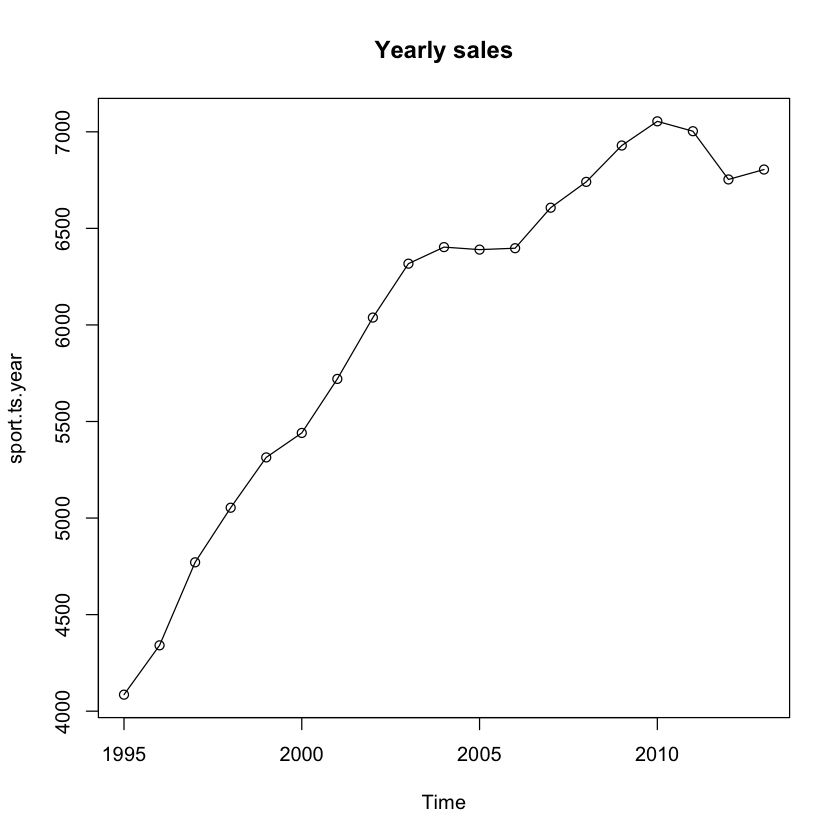

In [121]:
sport.ts.year<-aggregate(sport.ts,FUN="mean")
sport.ts.max<-aggregate(sport.ts,FUN="max")
sport.ts.sum<-aggregate(sport.ts,FUN="sum")
plot(sport.ts.year,type="o", main="Yearly sales")

This operation has eliminated the seasonal component and gives an idea about the trend. To better see and interpret the aggregation output, we represent on the same graph, the monthly and annual data.

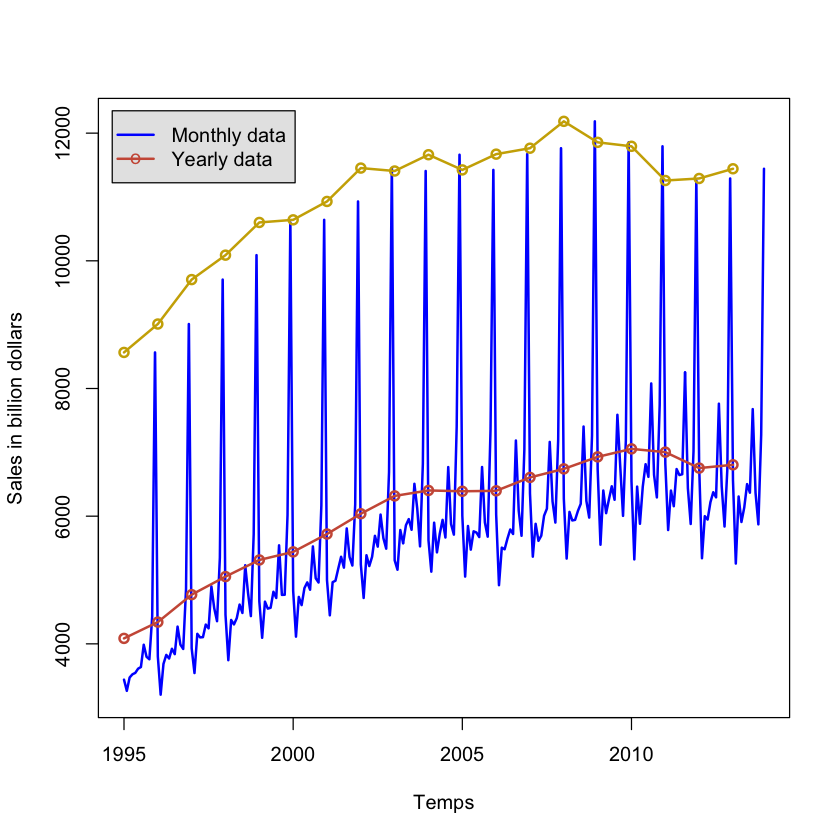

In [126]:
plot(sport.ts,col="blue",lwd=2,xlab="Temps",ylab="Sales in billion dollars")
lines(sport.ts.year,type="o", col="coral3",lwd=2)
lines(sport.ts.max,type="o", col="gold3",lwd=2)
lines(sport.ts.sum,type="o", col="green3",lwd=2)
legend("topleft", c("Monthly data","Yearly data"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","coral3"),pch=c('','o'))


There is an overestimation of the trend due to the extreme values that affect the calculation of averages.

***Question 4 :***  
Give the boxplot of the monthly and yearly distributions of data. Interpret results.  
*Remark :* The `boxplot(x~y)`  command plots the boxplot of the `x` data grouped by the criterion given by `y`. 

- To group data by cycle elements, use the `cycle()` function. We will use it in our example to assign the same index for data from the same month.    
  
- To group the data by year, we will use the command `rep(1:nb, each=12)` which gives the same index for the 12 values of the same year, where `nb` corresponds to the number of years: the size of the data divided by 12 (or the frequency in general).  Be careful when data do not start by the first element of the cycle (in February for example and not in January).
  
Hence, the data grouping  will  be by index.

In [ ]:
cycle(sport.ts)
rep(1:(length(sport.ts)/12),each=12)

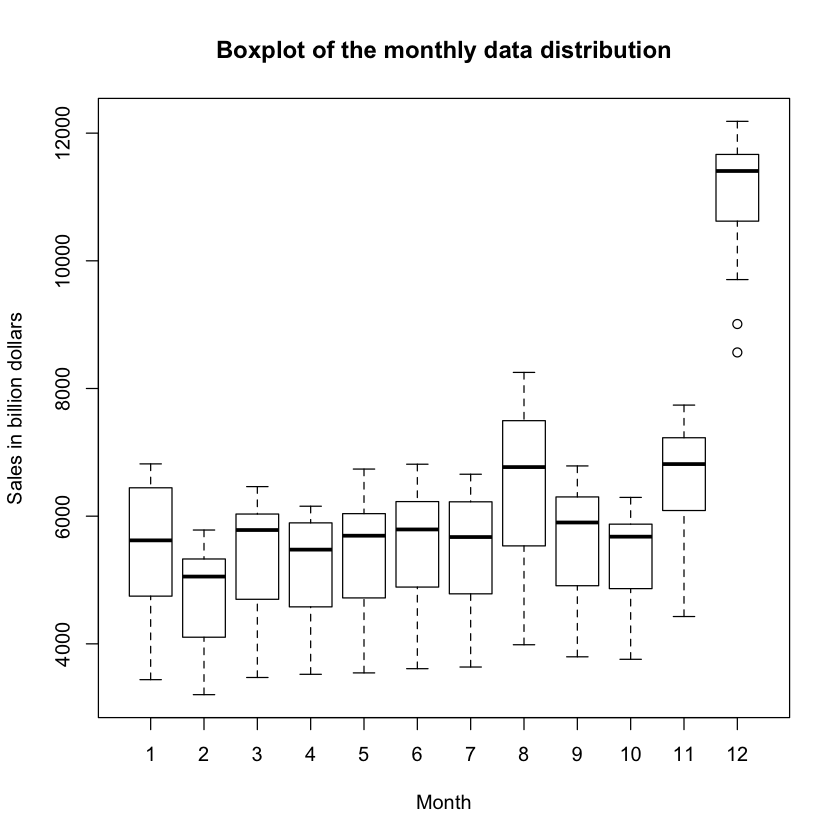

In [133]:
# Boxplot of the monthly data distribution
boxplot(sport.ts~cycle(sport.ts), xlab="Month", ylab="Sales in billion dollars", main="Boxplot of the monthly data distribution")

Sales are at their peak in December.

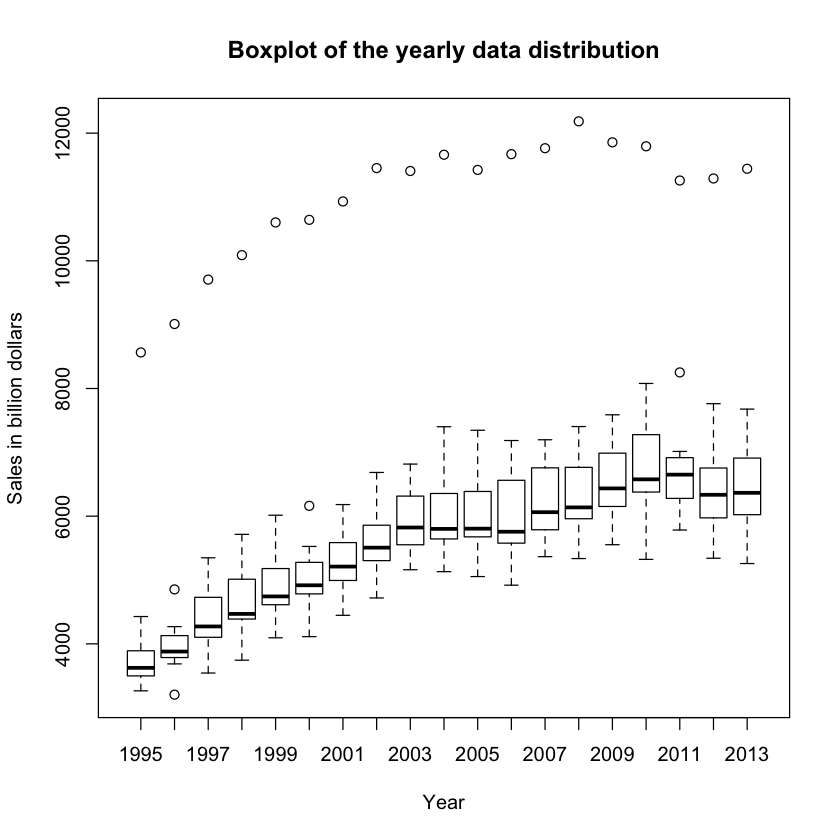

In [135]:
# Boxplot of the yearly data distribution
criterion=rep(1:(length(sport.ts)/12),each=12) #: the  displayed values on the x-axis are integer
criterion=rep(1995:2013,each=12) #: the  displayed values on the x-axis correspond to the years of study
boxplot(sport.ts~criterion, xlab="Year", ylab="Sales in billion dollars", main="Boxplot of the yearly data distribution")

The trend is clearly visible in the resulting figure.

***Question 5 & 6 & 7 :***   
*Q5 :* Give the trend, seasonality and error decomposition according to the additive and
multiplicative forms.  
*Q6 :* Give an approximation of the original series in the additive $(s+t)$ and multiplicative $(s*t)$
forms.  
*Q7 :* Represent graphically the obtained approximations and interpret results.


To do this, we start by using the `decompose()` function which decomposes the TS according to :   
  
1. The additive model $\displaystyle x_t=m(t)+s(t)+\varepsilon_t,\,t\in T$ by indicating `type=c("additive")`  

2. The multiplicative   model $\displaystyle x_t=m(t)*s(t)*\varepsilon_t,\,t\in T$ by indicating `type=c("multiplicative")`  
  
where 
- $x_t$ is the TS to be studied over  the interva $T$
- $m$ indicates the trend
- $s$ corresponds to the seasonal component 
- $\varepsilon_t$ is the residual component

***Additive model:***

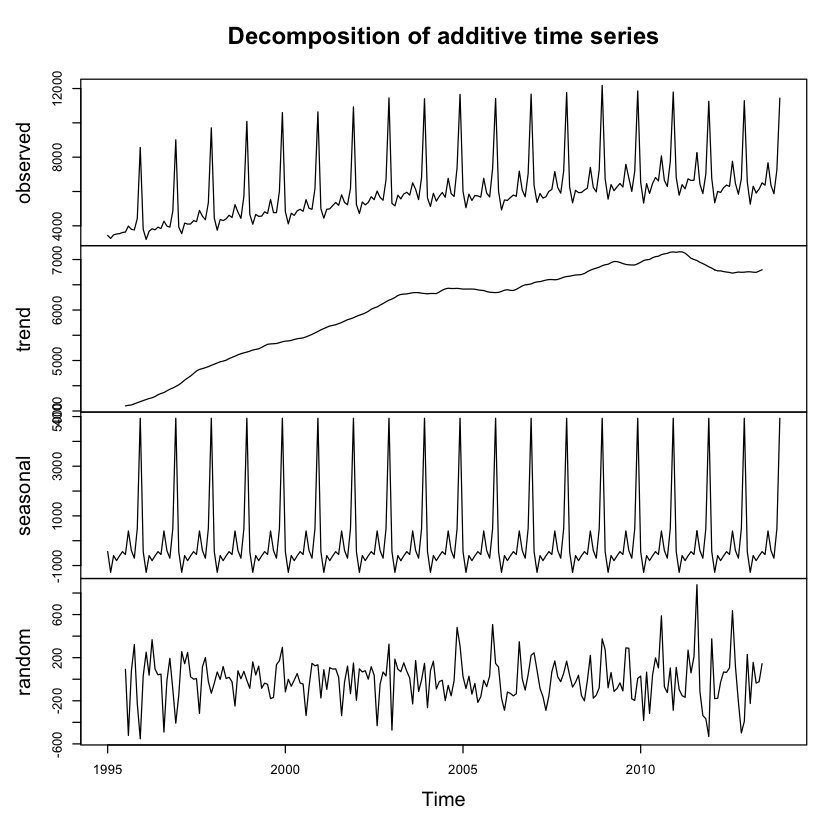

In [75]:
additive.decompose<-decompose(sport.ts,type=c("additive"))
plot(additive.decompose)

The  `decompose()` plot returns 4 plots:  
1. the original TS (observed).
2. The estimated trend by moving average.
3. The seasonal component, estimated for a single period (12 months) from $x_t-\hat{m(t)}$. For a single month, a single point is given corresponding to the average of the values for that month.
4. The residual component, corresponding to the model errors.

We display the output of the `decompose()` function to see how to recompose the estimated TS. To do this, we use the `names()` function

In [76]:
names(additive.decompose)

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

According to the output of `decompose()` function, the estimated model will be composed of the sum of `seasonal` and `trend` components.

In [77]:
additive.model<-additive.decompose$seasonal+additive.decompose$trend

We compare the result of TS modeling  by plotting on the same figure the original TS in blue and the estimated one in red.

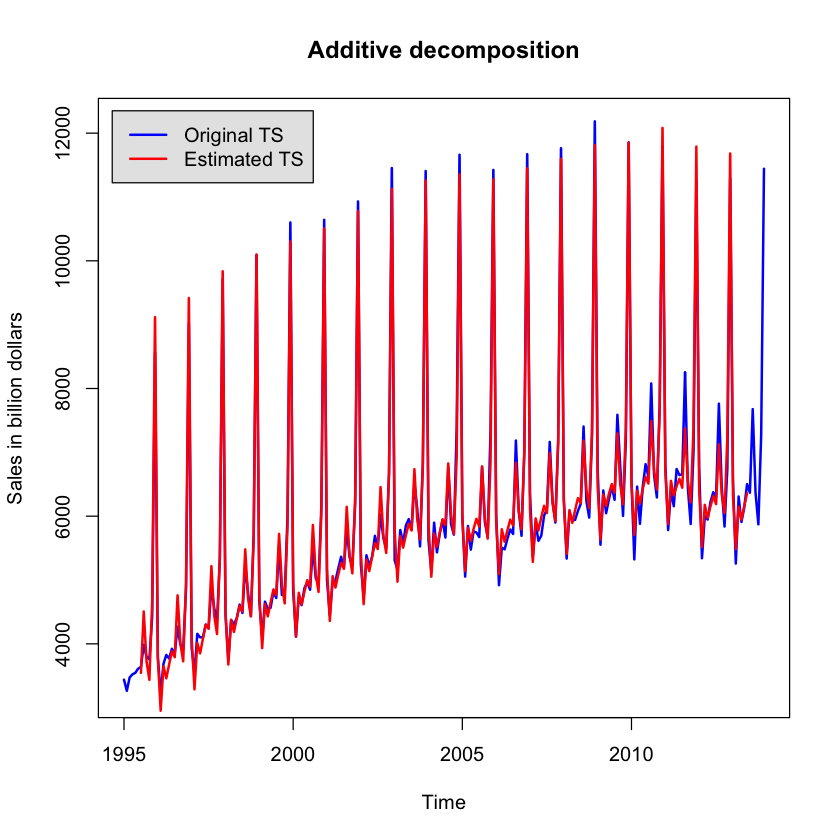

In [78]:
plot(sport.ts,col="blue",lwd=2,xlab="Time",ylab="Sales in billion dollars", main="Additive decomposition")
lines(additive.model,col="red",lwd=2)
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

For a better visualization of results, we zoom in on the period 1995-2000 (you can choose another period) using the `window()` function.

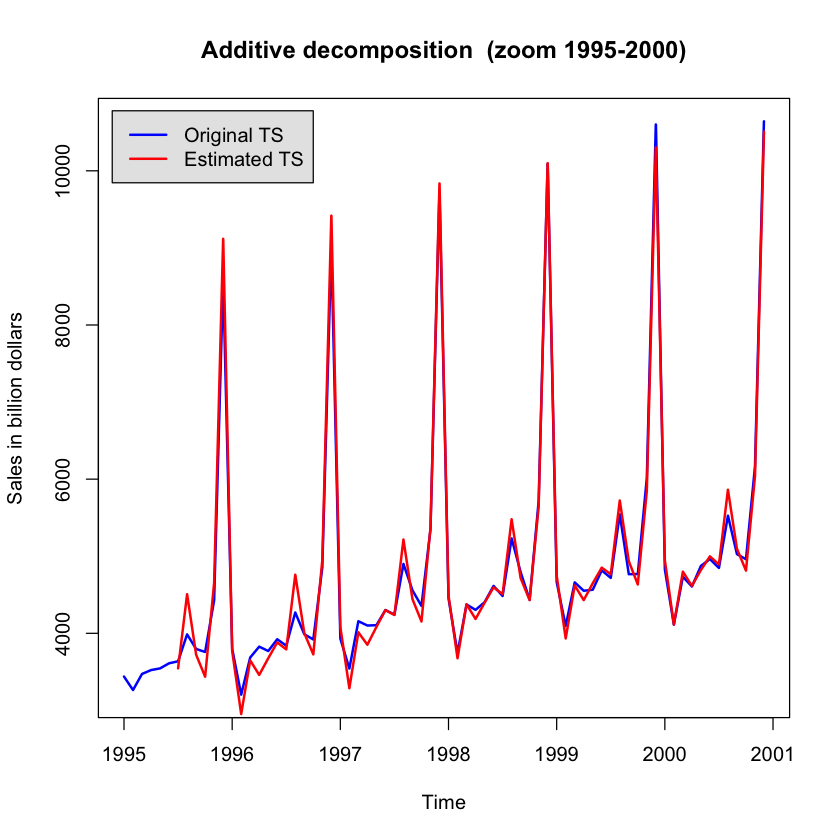

In [79]:
sport.ts.zoom<-window(sport.ts,start=c(1995,1),end=c(2000,12))
additive.model.zoom<-window(additive.model,start=c(1995,1),end=c(2000,12))

plot(sport.ts.zoom,col="blue",lwd=2,xlab="Time",ylab="Sales in billion dollars", main="Additive decomposition  (zoom 1995-2000)")
lines(additive.model.zoom,col="red",lwd=2)
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

The TS estimation seems to be consistent over this zoomed-in period.  
Be careful! The estimated ST does not start in January 1995 because of the use of a moving average filter (centered) for the estimation of the trend. It is the same for the end of the estimated TS. We can display it to see the missing data.

In [80]:
show(additive.model)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1995        NA        NA        NA        NA        NA        NA  3545.558
1996  3770.912  2952.741  3648.713  3459.863  3676.074  3881.754  3791.308
1997  4082.412  3287.074  4013.254  3851.572  4082.074  4301.129  4237.516
1998  4491.037  3676.449  4376.254  4185.863  4396.241  4596.921  4507.266
1999  4748.954  3933.324  4621.379  4430.613  4648.782  4852.046  4765.849
2000  4947.370  4113.616  4799.921  4615.197  4821.074  4998.338  4892.599
2001  5170.829  4358.574  5060.421  4881.863  5085.532  5267.796  5175.641
2002  5438.287  4622.616  5320.129  5139.863  5363.574  5575.754  5485.891
2003  5781.245  4973.907  5689.588  5506.947  5705.657  5878.629  5775.308
2004  5885.370  5052.824  5729.671  5523.530  5747.324  5951.754  5863.933
2005  5978.620  5140.532  5817.796  5613.947  5802.074  5959.296  5835.891
2006  5913.162  5094.032  5795.171  5599.863  5779.407  5946.338  5855.766
2007  6106.037  5283.241 

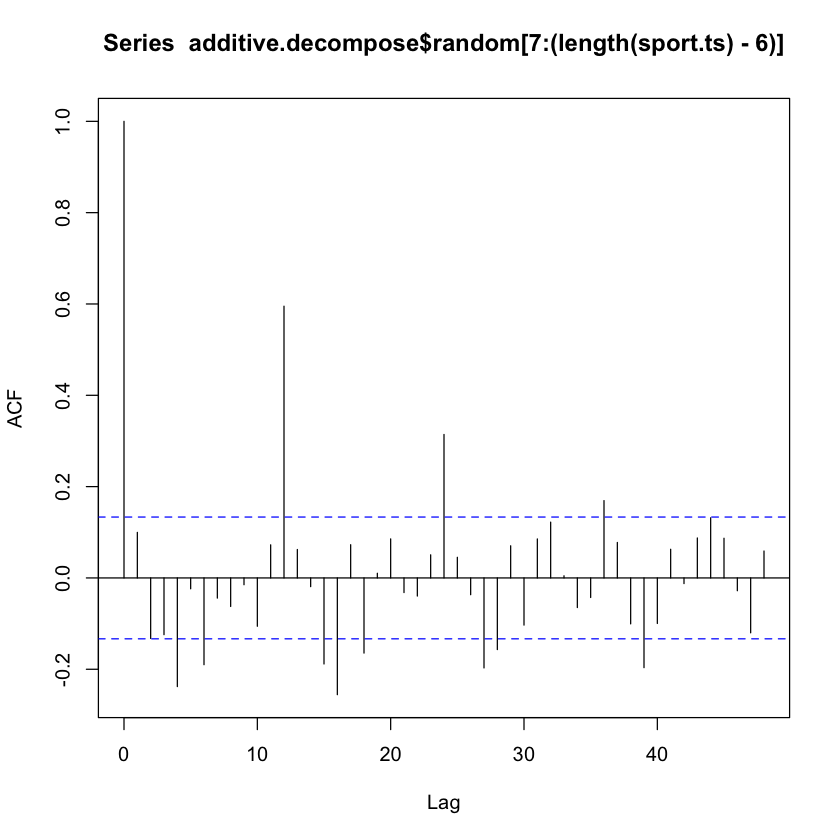

In [136]:
acf(additive.decompose$random[7:(length(sport.ts)-6)],lag=48)

6 values at the beginning and 6 values at the end are missing. The sum gives the value of a period.

***Multiplicative model:***

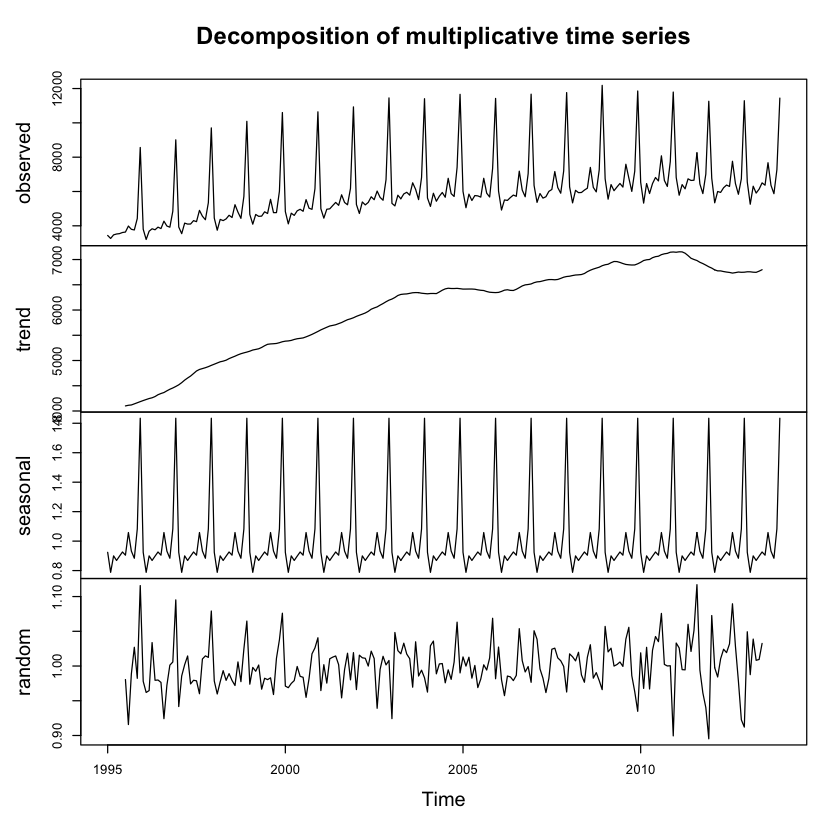

In [84]:
multiplicative.decomposition<-decompose(sport.ts,type=c("multiplicative"))
plot(multiplicative.decomposition)

From the output of the `decompose()` function we see no difference from the two models.

In [85]:
multiplicative.model<-multiplicative.decomposition$seasonal*multiplicative.decomposition$trend

As for the additive model, we plot the two series: original in blue and estimated in green for visual comparison.

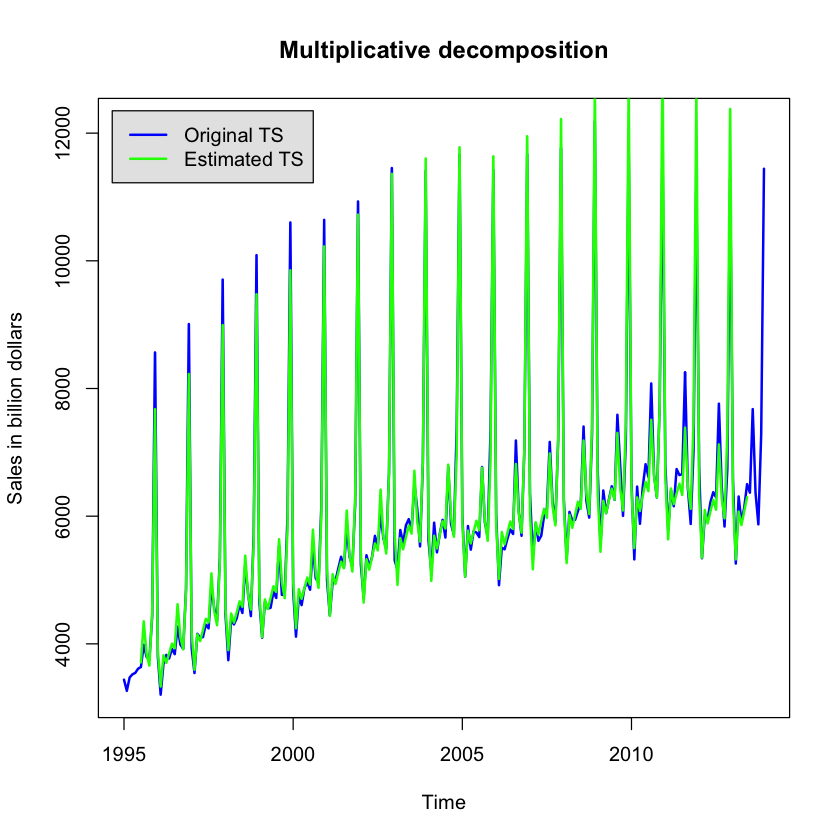

In [86]:
plot(sport.ts,col="blue",lwd=2,xlab="Time",ylab="Sales in billion dollars", main="Multiplicative decomposition")
lines(multiplicative.model,col="green",lwd=2)
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","green"))

The multiplicative model also seems to give acceptable results. 
We visually compare the two models on the same figure by considering a zoom.

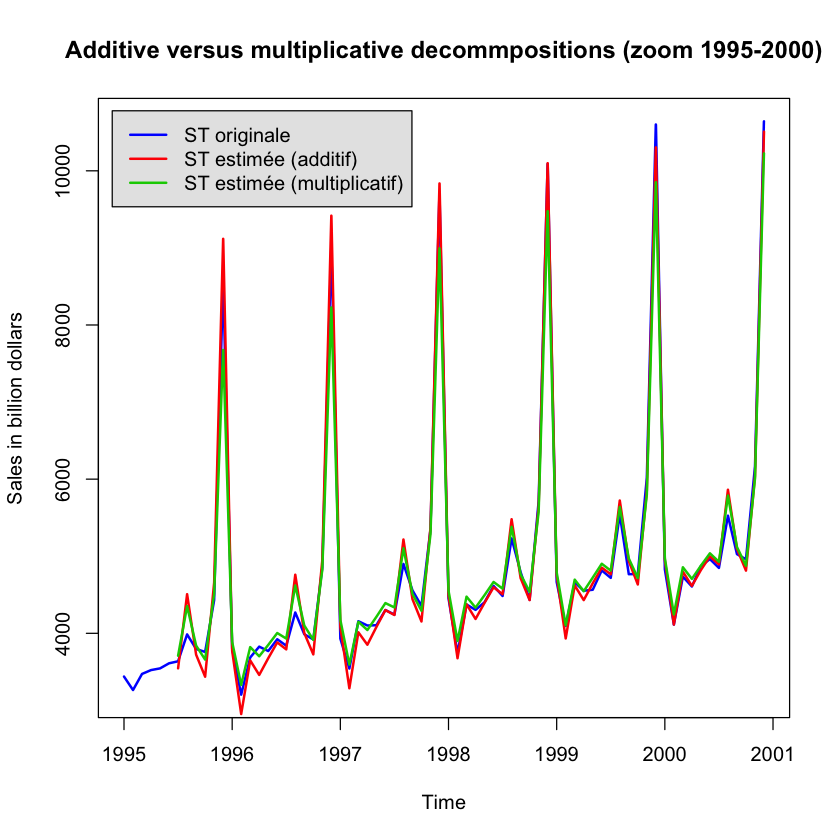

In [87]:
multiplicative.model.zoom<-window(multiplicative.model,start=c(1995,1),end=c(2000,12))

plot(sport.ts.zoom,col="blue",lwd=2,xlab="Time",ylab="Sales in billion dollars", main="Additive versus multiplicative decommpositions (zoom 1995-2000)")
lines(additive.model.zoom,col="red",lwd=2)
lines(multiplicative.model.zoom,col="green3",lwd=2)
legend("topleft", c("ST originale","ST estimée (additif)","ST estimée (multiplicatif)"),inset = .02,
       bg = "gray90",lwd=c(2,2,2),col=c("blue","red","green3"))

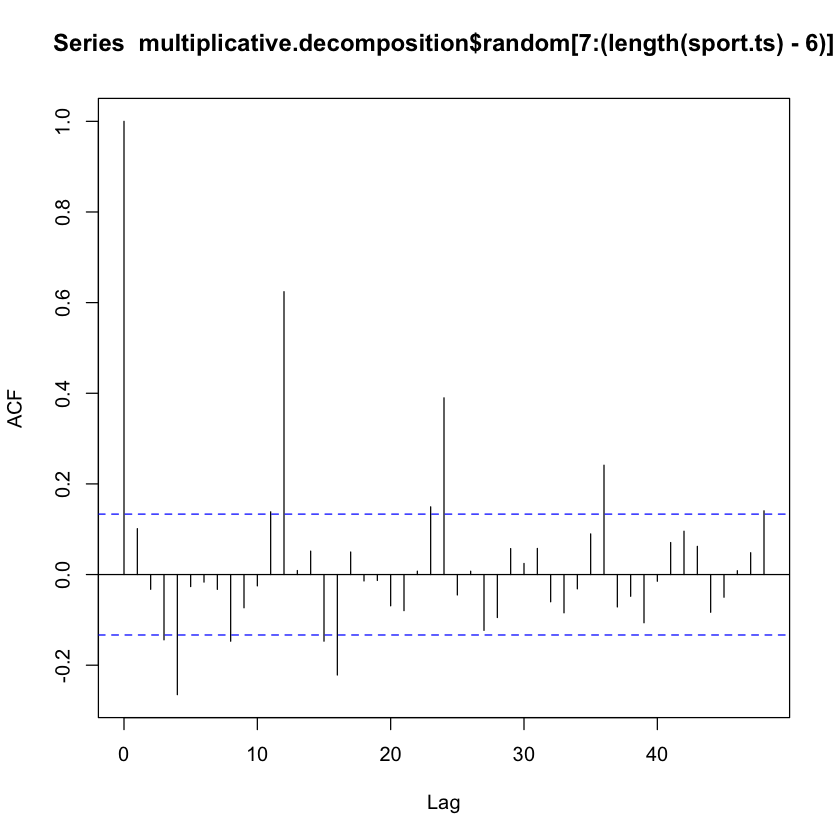

In [89]:
acf(multiplicative.decomposition$random[7:(length(sport.ts)-6)],lag=48)

It is difficult to choose between the two models. A way to decide which model to consider is to use model comparison criteria.

# Presentation of the classes `xts`, and `zoo`

## The XTS class: eXtensible Time Series


In [45]:
# install.packages('xts') if needed
library(xts)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


Creation of an object of the date class including the dates to associate with the data. We specify the start date, the end date and the frequency: `days`, `weeks`, `quarters`, `months`, `years`.

In [141]:
date.sport<-seq(as.Date("1995/1/1"),as.Date('2013/12/1'),"months")
class(date.sport)
# Checking the size of the created date object
length(date.sport)

[1] "Date"

[1] 228

Create an object of the class xts, using the function `xts`, representing the data `sport` according to the dates `date.sport`.

**Becareful about dimensions!**

In [142]:
length(sport$V1)

[1] 267

In [143]:
sport.xts<-xts(sport$V1[1:length(date.sport)],order.by=date.sport)
# sport is of class data.frame having only one column labeled V1 (check with names(sport)).

Display of the generated TS. The representation of the  xts TS is different from that of the ts one. The data (here univariate) are represented in a single column referenced by time.

In [144]:
head(sport.xts,20) # representation of the first 20 values.

           [,1]
1995-01-01 3439
1995-02-01 3264
1995-03-01 3473
1995-04-01 3523
1995-05-01 3545
1995-06-01 3611
1995-07-01 3637
1995-08-01 3986
1995-09-01 3797
1995-10-01 3758
1995-11-01 4428
1995-12-01 8565
1996-01-01 3801
1996-02-01 3204
1996-03-01 3686
1996-04-01 3827
1996-05-01 3770
1996-06-01 3923
1996-07-01 3839
1996-08-01 4270

Representation of the xts TS.

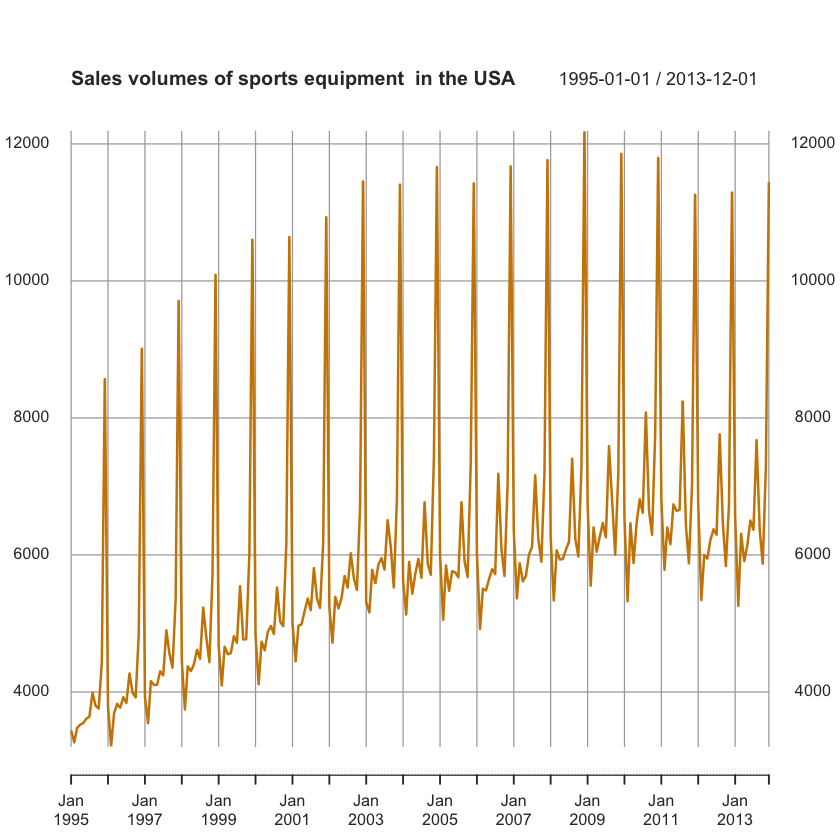

In [92]:
plot(sport.xts, xlab="Time", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="orange3",lwd=2)

Zooming in xts is done differently as follows:

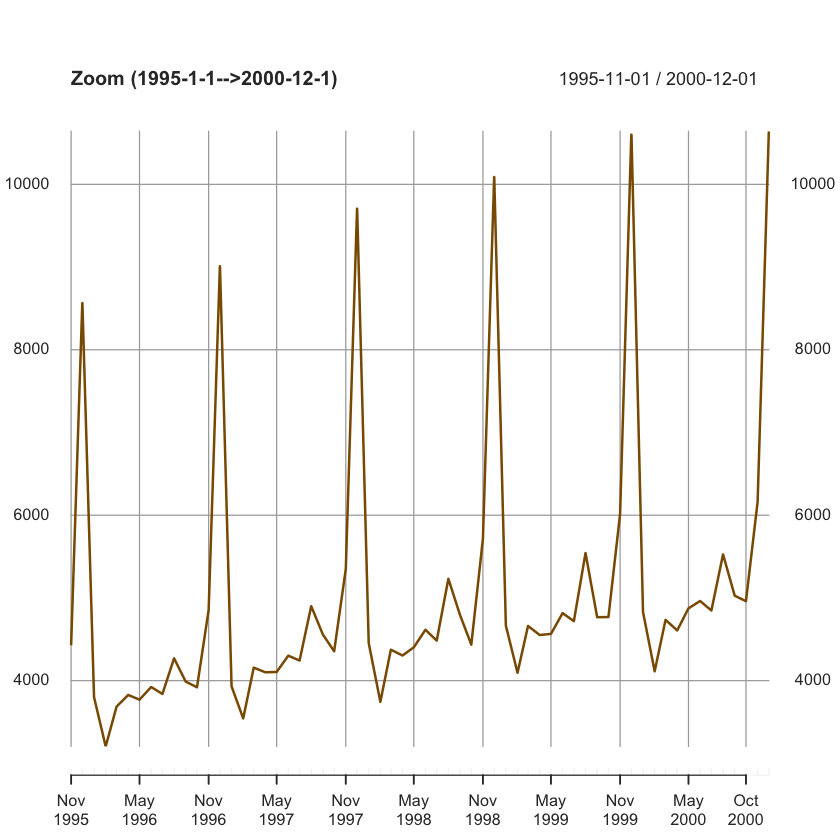

In [150]:
sport.xts.zoom<-sport.xts['1995-1-1/2000-12-1']
plot(sport.xts.zoom, xlab="Time", ylab="Sales volumes (in billion dollars)",
     main="Zoom (1995-1-1-->2000-12-1)",
     col="orange4",lwd=2)

The aggregation of data under xts can be done through the following functions:  

- apply.daily(object_xts, FUN, ...)
- apply.weekly(object_xts, FUN, ...)
- apply.monthly(object_xts, FUN, ...)
- apply.quarterly(object_xts, FUN, ...)
- apply.yearly(object_xts, FUN, ...)

We use the last one to transform the monthly data into yearly data by applying the `mean` function.

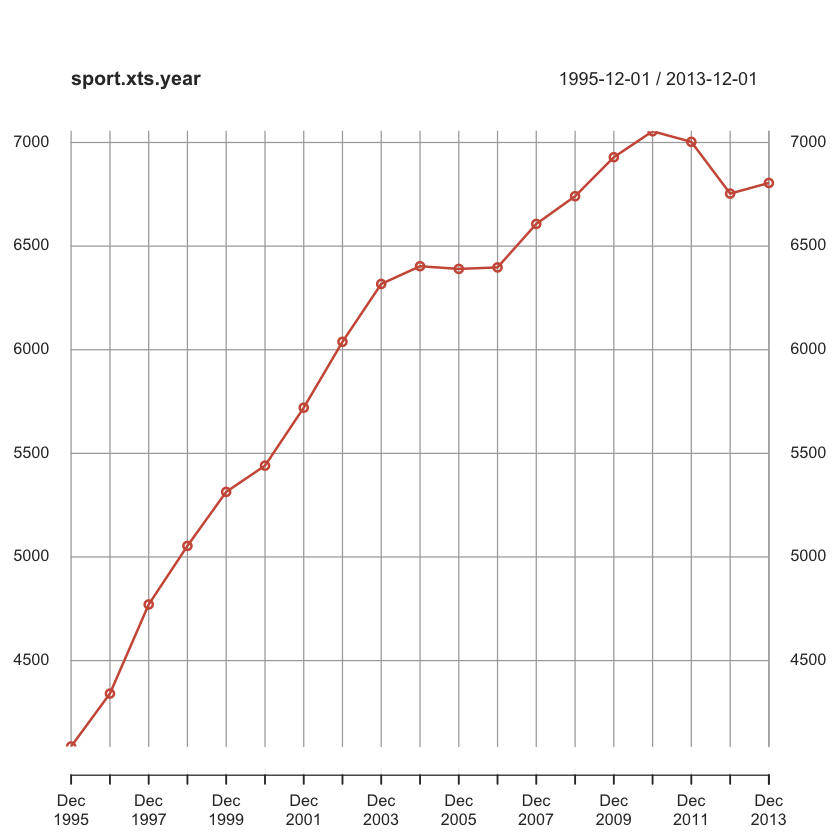

In [94]:
sport.xts.year<-apply.yearly(sport.xts,FUN="mean")
plot(sport.xts.year,type="o", col="coral3",lwd=2)


## La classe zoo

In [95]:
# install.packages('zoo') if needed (it could be already done when installing xts first)
library(zoo)

Create an object of class zoo, using the function `zoo`, representing the data `sport` according to the dates `date.sport`.


**Becareful about dimensions!**

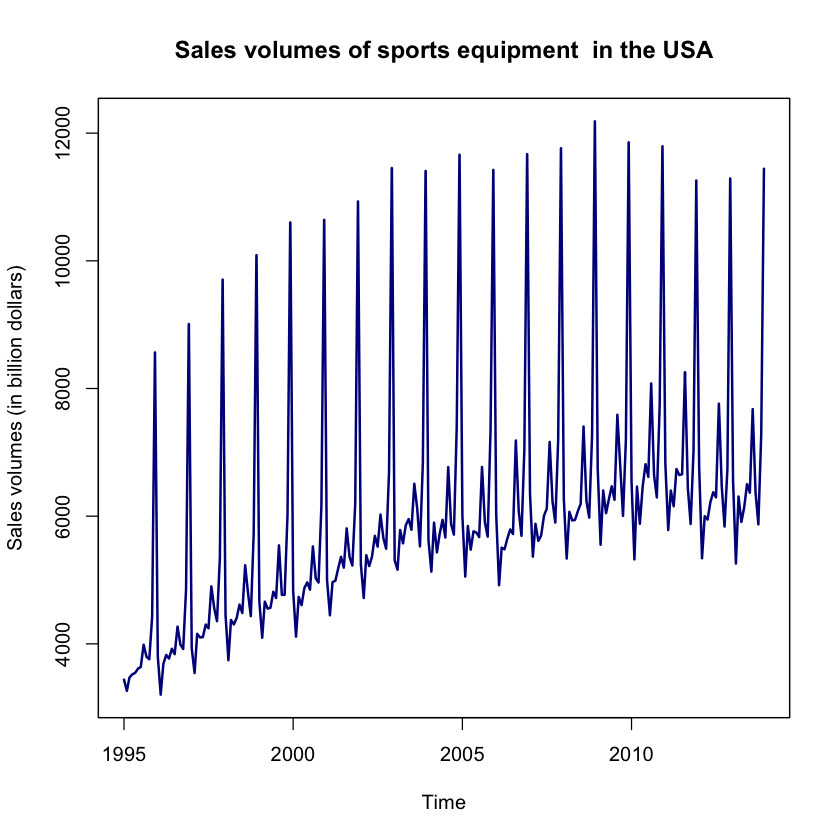

In [96]:
sport.zoo<-zoo(sport$V1[1:length(date.sport)],order.by=date.sport)
plot(sport.zoo, xlab="Time", ylab="Sales volumes (in billion dollars)",
     main="Sales volumes of sports equipment  in the USA",
     col="blue4",lwd=2)

The representation of the zoo TS are in the following form:

In [97]:
head(sport.zoo,20)

1995-01-01 1995-02-01 1995-03-01 1995-04-01 1995-05-01 1995-06-01 1995-07-01 
      3439       3264       3473       3523       3545       3611       3637 
1995-08-01 1995-09-01 1995-10-01 1995-11-01 1995-12-01 1996-01-01 1996-02-01 
      3986       3797       3758       4428       8565       3801       3204 
1996-03-01 1996-04-01 1996-05-01 1996-06-01 1996-07-01 1996-08-01 
      3686       3827       3770       3923       3839       4270 

Zoom under `zoo` : same as `ts` but with a different format of dates (start and end).

In [54]:
sport.zoo.zoom<-window(sport.zoo,start="1995-1-1",end="2000-12-1")